In [27]:
# Import Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


In [28]:
#Import data 
csv_path = "ois_clean.csv" 
Officer_shootings_df = pd.read_csv(csv_path)
Officer_shootings_df.head()



,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,Tim Elliot,1/2/2015,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,Lewis Lee Lembke,1/2/2015,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,John Paul Quintero,1/3/2015,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,Matthew Hoffman,1/4/2015,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,Michael Rodriguez,1/4/2015,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [29]:
#creater bins
age_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100]

#create group names
group_names = ["Under 10", "11-15","16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "Over 80"]

In [30]:
#drop in bins
Officer_shootings_df["age_range"]= pd.cut(Officer_shootings_df["age"], age_bins, labels=group_names)
Officer_shootings_df.head()

,Unnamed: 0,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_range
0,0,Tim Elliot,1/2/2015,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,51-55
1,1,Lewis Lee Lembke,1/2/2015,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,46-50
2,2,John Paul Quintero,1/3/2015,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,21-25
3,3,Matthew Hoffman,1/4/2015,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,31-35
4,4,Michael Rodriguez,1/4/2015,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,36-40


In [41]:
#group by age bins

Officer_shootings_df_bins = Officer_shootings_df.groupby("age_range")
#Officer_shootings_df_bins.head()
values = Officer_shootings_df_bins["age_range"].count()
values



age_range
Under 10      1
11-15        15
16-20       205
21-25       441
26-30       474
31-35       494
36-40       383
41-45       289
46-50       243
51-55       184
56-60       133
61-65        67
66-70        41
71-75        16
76-80         9
Over 80       5
Name: age_range, dtype: int64

In [42]:
#Officer_shootings_df_bins.describe()

Currently working on a visual for incidents per age category.  Initually used a histogram.  I decided to use a bar but haven't displayed it successfully and now I can't reproduce the histogram again.


In [43]:
y_valueslist = values.tolist()

x_valueslist = age_bins[0:-1]


In [44]:

print(x_valueslist)

[0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]


(-0.75, 48)

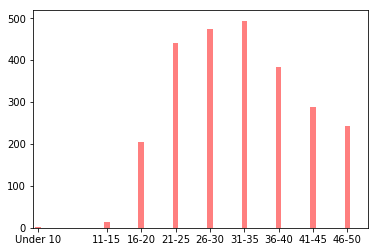

In [52]:
plt.bar(x_valueslist, y_valueslist, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_valueslist]
plt.xticks(tick_locations, group_names)


#set xlimits 
plt.xlim(-.75, len(x_valueslist)*3)

In [47]:
#tick_locations = [value for value in x_valueslist]
#plt.xticks(tick_locations, group_names)
